# Analisando dataset 4i

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'Datasets/IC_Tiago.xlsx')
df.head()

,data_tidy,pim,mes,ano,ici,icc,massa_real,pmc,pmc_a,pop_des,...,pop_ea_lag12,pop_ocu_lag12,pmr_diesel_lag12,pmr_gasolina_lag12,rend_medio_lag12,saldo_caged_lag12,saldo_total_lag12,cambio_brl_uds_lag12,taxa_desemprego_lag12,taxa_selic_lag12
0,2003-03-01,77.4,3,2003,97.6,87.011047,98749.7133,44.2,42.8,9053.2285,...,77427.6226,68210.2936,0.7249,1.2630,1554.5760,72100.600337,46.68,100.0000,11.9044,9.8398
1,2003-04-01,76.5,4,2003,96.4,89.899816,100342.0683,44.9,43.7,9393.8656,...,78069.1358,69058.4344,0.7690,1.3707,1581.5737,156101.620305,76.80,98.6423,11.5420,9.7733
2,2003-05-01,79.7,5,2003,90.0,82.646239,97535.5706,46.9,45.6,9989.9222,...,77615.9934,68869.2148,0.7919,1.4020,1615.3115,74574.875503,59.82,105.1968,11.2693,10.1373
3,2003-06-01,76.3,6,2003,86.3,84.138842,98710.4501,44.0,43.0,9900.6274,...,78350.3862,69962.3955,0.8025,1.3880,1588.5358,83309.433880,54.32,114.7165,10.7057,10.3134
4,2003-07-01,81.3,7,2003,83.4,82.647986,100087.3149,46.5,46.2,10424.0314,...,79883.1870,70558.2355,0.8453,1.4042,1654.6351,1588.819793,109.40,122.6770,11.6732,10.4324


In [3]:
# Excluindo data
df.drop(columns=['data_tidy'], inplace=True)

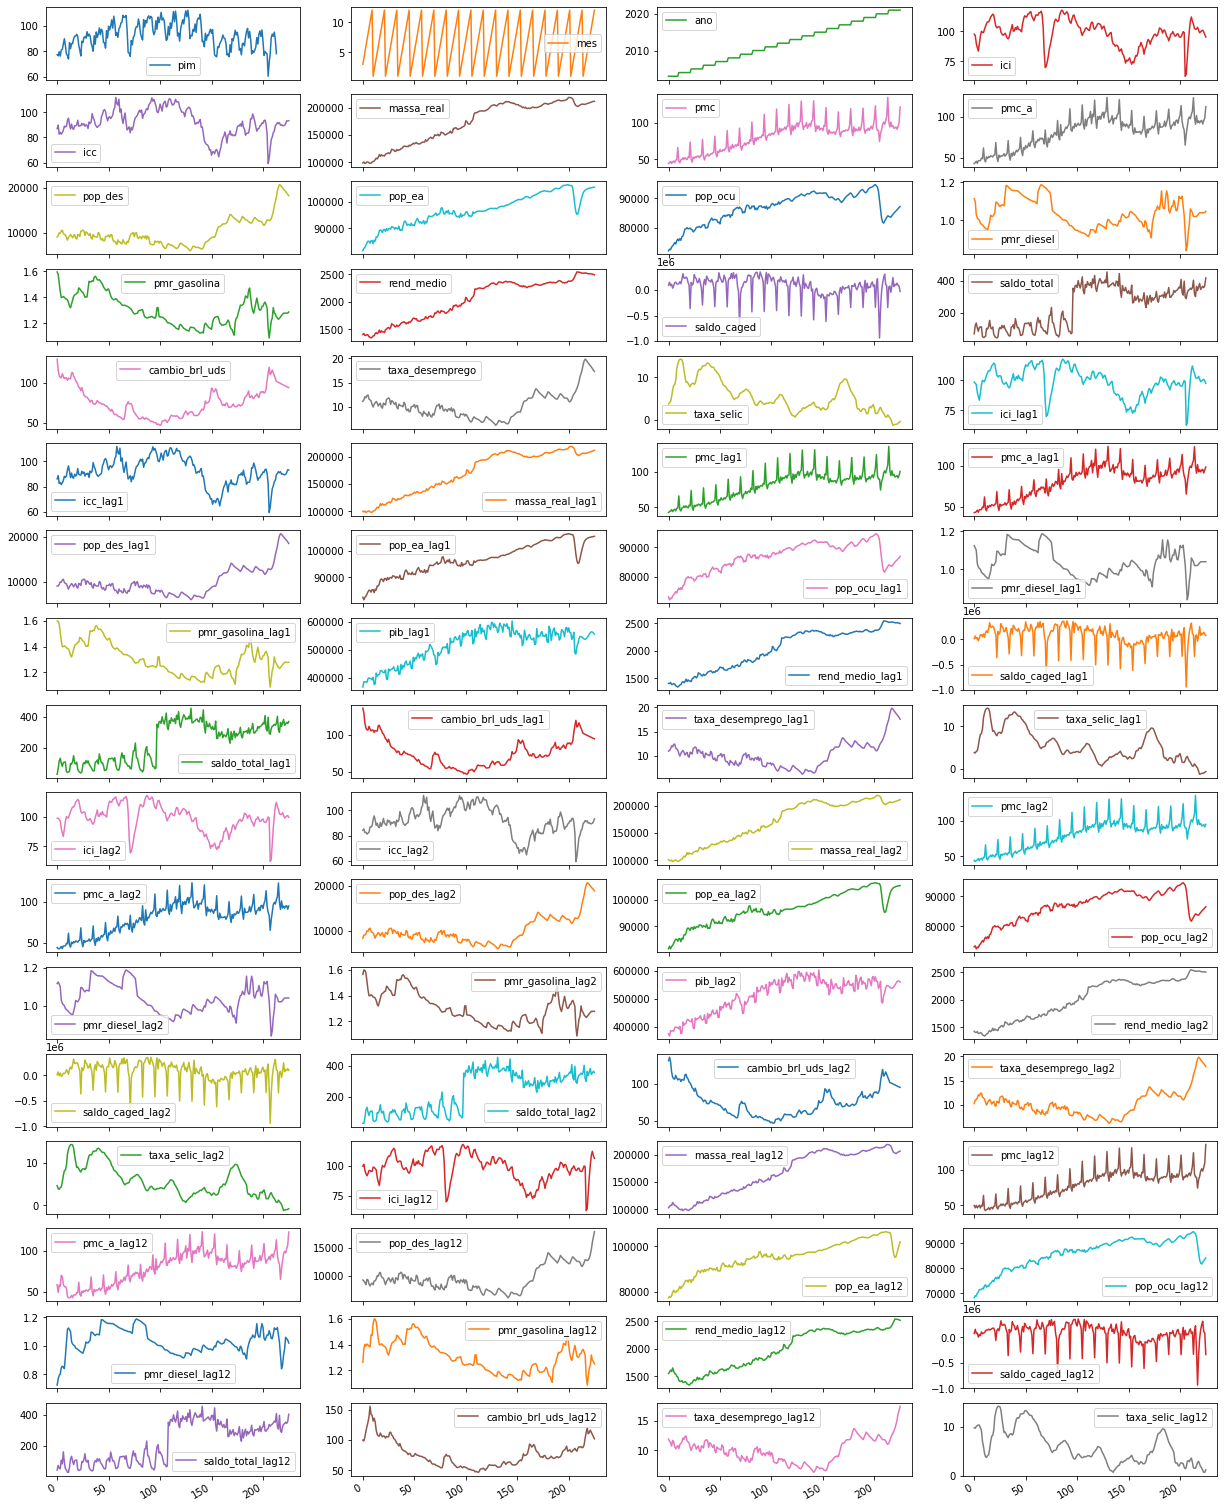

In [4]:
#plotando gráfico de todas colunas
df.plot(subplots=True, layout=(17,4), figsize=(21,30))
plt.show()

Por mais que todas as colunas contenham valores numéricos as colunas "mes" e "ano" contêm valores classificativos, então pode ser interessante separar em "dummies", isso será testado

In [5]:
df_dummies = pd.get_dummies(df, columns=['mes','ano'])
df_dummies.head()

,pim,ici,icc,massa_real,pmc,pmc_a,pop_des,pop_ea,pop_ocu,pmr_diesel,...,ano_2012,ano_2013,ano_2014,ano_2015,ano_2016,ano_2017,ano_2018,ano_2019,ano_2020,ano_2021
0,77.4,97.6,87.011047,98749.7133,44.2,42.8,9053.2285,81463.8386,72410.6100,1.1135,...,0,0,0,0,0,0,0,0,0,0
1,76.5,96.4,89.899816,100342.0683,44.9,43.7,9393.8656,82344.8527,72950.9871,1.0995,...,0,0,0,0,0,0,0,0,0,0
2,79.7,90.0,82.646239,97535.5706,46.9,45.6,9989.9222,82779.0904,72789.1682,1.0295,...,0,0,0,0,0,0,0,0,0,0
3,76.3,86.3,84.138842,98710.4501,44.0,43.0,9900.6274,83565.8216,73665.1942,1.0127,...,0,0,0,0,0,0,0,0,0,0
4,81.3,83.4,82.647986,100087.3149,46.5,46.2,10424.0314,84457.4354,74033.4040,1.0046,...,0,0,0,0,0,0,0,0,0,0


Uma vez que há uma discrepância muito alta na escala dos valores de cada coluna, todas serão reescalonadas entre 0 e 1

In [6]:
df_scaler = MinMaxScaler()
df_scaler.fit(df_dummies)

column_names = df_dummies.columns

df_scaled = df_scaler.transform(df_dummies)
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
df_scaled.head()

,pim,ici,icc,massa_real,pmc,pmc_a,pop_des,pop_ea,pop_ocu,pmr_diesel,...,ano_2012,ano_2013,ano_2014,ano_2015,ano_2016,ano_2017,ano_2018,ano_2019,ano_2020,ano_2021
0,0.325670,0.636528,0.526826,0.009970,0.002198,0.000000,0.207557,0.000000,0.000000,0.786246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.308429,0.614828,0.581746,0.023045,0.009891,0.011125,0.230813,0.035301,0.024406,0.746132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.369732,0.499096,0.443845,0.000000,0.031870,0.034611,0.271506,0.052700,0.017097,0.545559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.304598,0.432188,0.472221,0.009647,0.000000,0.002472,0.265409,0.084224,0.056662,0.497421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.400383,0.379747,0.443878,0.020953,0.027474,0.042027,0.301142,0.119949,0.073292,0.474212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotando variável alvo junto com as demais, pode ser útil para decidir visualmente quais variáveis seguem uma mesma tendência

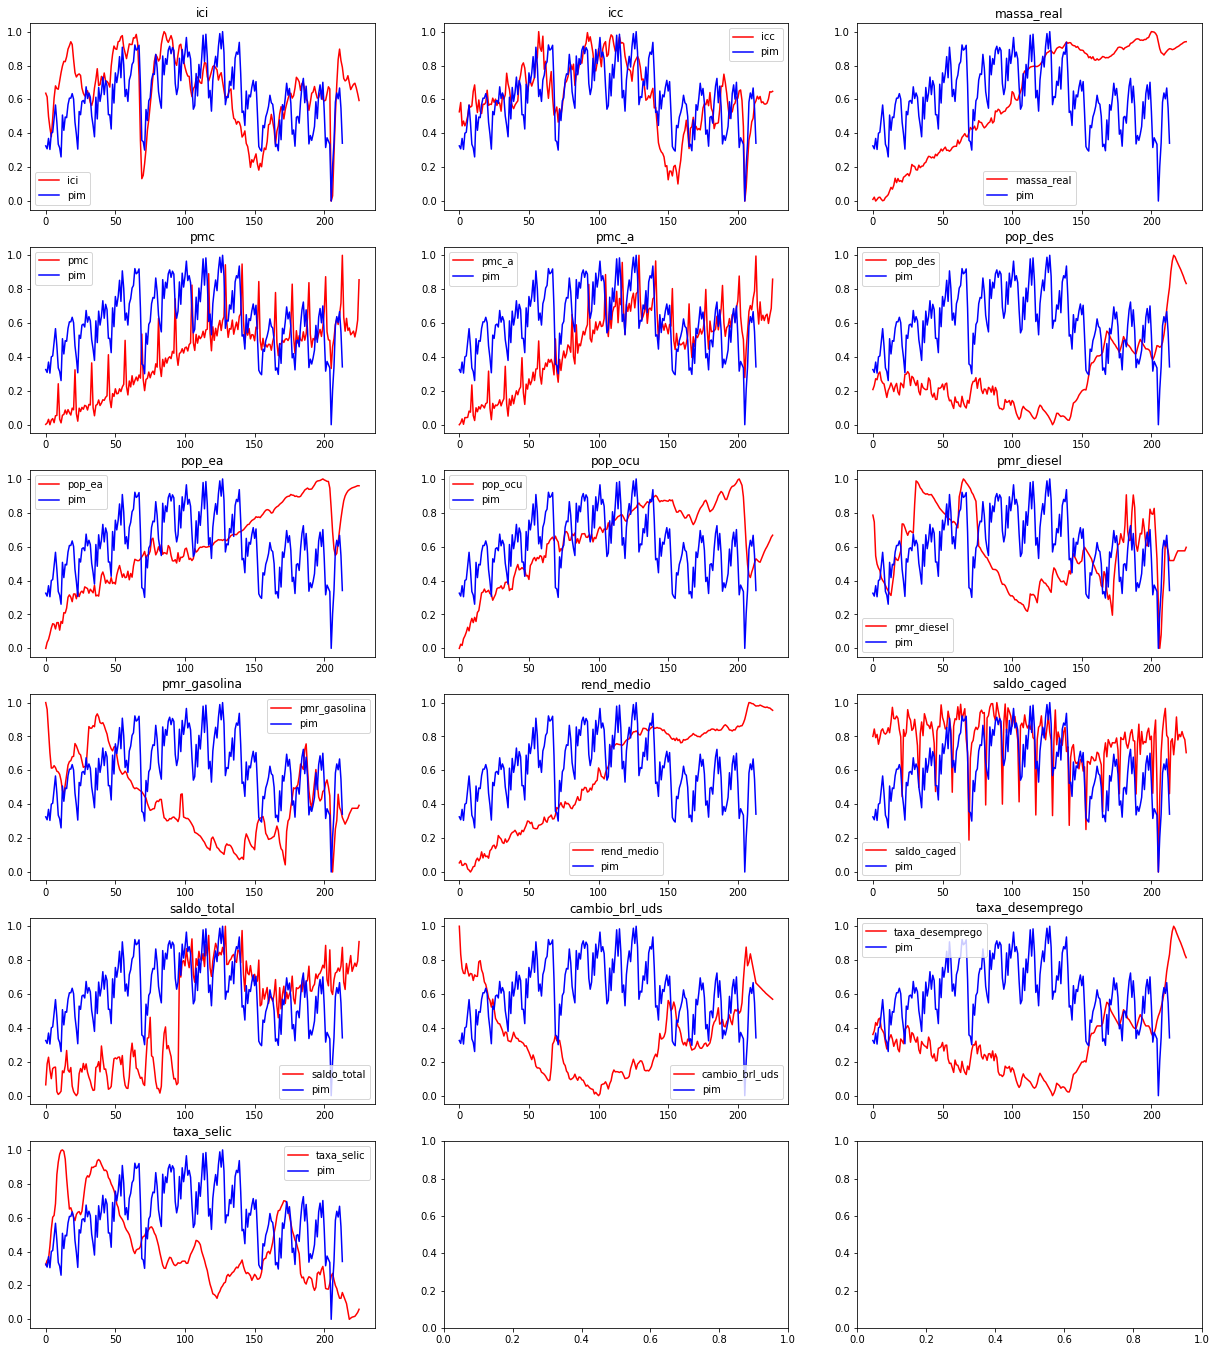

In [7]:
def plot_col_target(columns_plot, target_plot):
    fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(21,24))

    i = 0 #controlar as linhas
    j = 0 #controlar as colunas

    for column in columns_plot:
        ax[i][j].plot(df_scaled[column], color='red', label=column)
        ax[i][j].plot(df_scaled[target_plot], color='blue', label=target_plot)
        ax[i][j].legend()
        ax[i][j].set_title(column)
        j +=1
        if j==3:
            j = 0
            i += 1
            
            
# separando colunas para plotar junto com a variável alvo
columns_plot = ['ici','icc','massa_real','pmc','pmc_a','pop_des','pop_ea','pop_ocu','pmr_diesel','pmr_gasolina',
               'rend_medio','saldo_caged','saldo_total','cambio_brl_uds','taxa_desemprego','taxa_selic']
target_plot = 'pim'

plot_col_target(columns_plot, target_plot)

Separar dados para treino, teste e para previsão

In [8]:
df_target = df_scaled[214:]
df_study = df_scaled[:214]

In [9]:
#Separando dados de treino e teste para estudos
X = df_study.drop(columns=['pim'])
y = df_study['pim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

Aplicando Random Search

In [14]:
space = {'kernel':['rbf','linear','sigmoid'], 
                 'gamma':['scale','auto'], 
                 'C':(np.arange(10,100)/100).tolist(), 
                 'epsilon':(np.arange(1,1e3)/1e3).tolist()}

svr_ = RandomizedSearchCV(SVR(), space, n_iter = 60, cv=5, verbose = 1)

In [16]:
svr = SVR()

svr.fit(X_train, y_train)
svr_.fit(X_train, y_train)

y_svr = svr.predict(X)
y_svr_ = svr_.predict(X)

svr_score = svr.score(X_test, y_test)
svr_score_ = svr_.score(X_test, y_test)

print("Score SVR: ", svr_score)
print("Score SVR + Random search: ", svr_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Score SVR:  0.7579353583389248
Score SVR + Random search:  0.9484643719714082


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished


Text(0.5, 1.0, 'Pontuações')

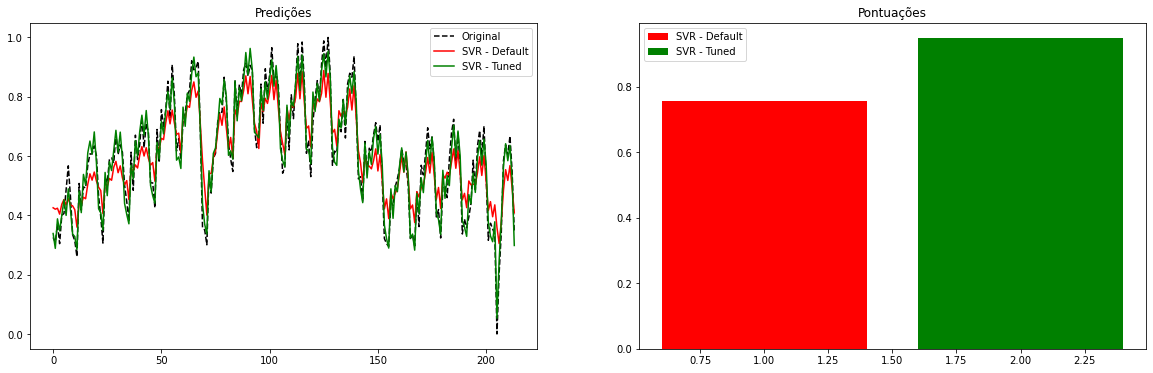

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].plot(y, color ='black', linestyle = '--', label='Original')
ax[0].plot(y_svr, color ='red', label='SVR - Default')
ax[0].plot(y_svr_, color ='green', label='SVR - Tuned')
ax[0].legend()
ax[0].set_title("Predições")

ax[1].bar(1, svr_score, color="r", label='SVR - Default')
ax[1].bar(2, svr_score_, color="g", label='SVR - Tuned')
ax[1].legend()
ax[1].set_title("Pontuações")

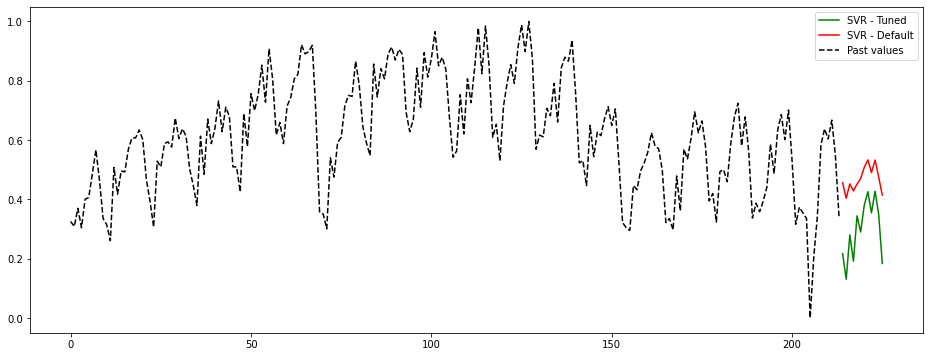

In [32]:
#Prevendo valores faltantes

X_valid = df_target.drop(columns='pim')

svr_pred_target = svr.predict(X_valid)
svr_pred_target_ = svr_.predict(X_valid)

plt.figure(figsize=(16,6))
plt.plot(np.arange(214,226), svr_pred_target_, label ='SVR - Tuned', color='green')
plt.plot(np.arange(214,226), svr_pred_target, label='SVR - Default', color='red')
plt.plot(y, label='Past values', color='black',linestyle='--')
plt.legend()
plt.show()

In [33]:
gabarito = pd.read_excel(r'Datasets/IC_Tiago.xlsx')

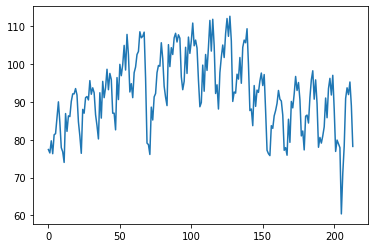

In [43]:
plt.plot(gabarito['pim'])

AttributeError: 'Series' object has no attribute 'reshape'